<a href="https://colab.research.google.com/github/jarvind20/GWDataMining_DATS2103/blob/main/AS4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install virtualenv
!virtualenv myenv
!source myenv/bin/activate
!pip install numpy==1.26.4 scipy==1.11.4 pandas==2.2.2 lxml==5.2.2 scikit-learn==1.5.0 joblib==1.4.2 statsmodels==0.14.2 lifelines==0.28.0 pygam==0.9.1 l0bnb==1.0.0 torch==2.3.0 torchvision==0.18.0 pytorch-lightning==2.2.5 torchinfo==1.8.0 torchmetrics==1.4.0.post0 ISLP==0.4.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 48.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 469.0/469.0 kB 28.7 MB/s eta 0:00:00
created virtual environment CPython3.10.12.final.0-64 in 1139ms
  creator CPython3Posix(dest=/content/myenv, clear=False, no_vcs_ignore=False, global=False)
  seeder FromAppData(download=False, pip=bundle, setuptools=bundle, wheel=bundle, via=copy, app_data_dir=/root/.local/share/virtualenv)
    added seed packages: pip==24.2, setuptools==75.2.0, wheel==0.44.0
  activators BashActivator,CShellActivator,FishActivator,NushellActivator,PowerShellActivator,PythonActivator
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.8/79.8 kB 5.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 45.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/

In [ ]:
import numpy as np
from matplotlib.pyplot import subplots, cm
import sklearn.model_selection as skm
from ISLP import load_data, confusion_table

from sklearn.svm import SVC
from ISLP.svm import plot as plot_svm
from sklearn.metrics import RocCurveDisplay

Linear Kernel - Train Error: 0.175, Test Error: 0.000
Polynomial Kernel - Train Error: 0.113, Test Error: 0.000
RBF Kernel - Train Error: 0.037, Test Error: 0.000


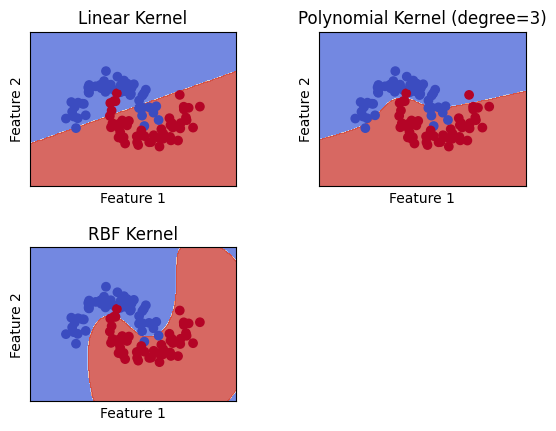

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import sklearn.datasets as skd
import sklearn.model_selection as skm

#Q1

np.random.seed(42)

X, y = skd.make_moons(n_samples=100, noise=0.15, random_state=42)
X_train, X_test, y_train, y_test = skm.train_test_split(X, y, test_size=0.2, random_state=42)


svc_linear = SVC(kernel='linear', random_state=42)
svc_poly = SVC(kernel='poly', degree=3, random_state=42)
svc_rbf = SVC(kernel='rbf', random_state=42)


svc_linear.fit(X_train, y_train)
svc_poly.fit(X_train, y_train)
svc_rbf.fit(X_train, y_train)


x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))


titles = ['Linear Kernel', 'Polynomial Kernel (degree=3)', 'RBF Kernel']
for i, clf in enumerate([svc_linear, svc_poly, svc_rbf]):
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])


train_errors = [1 - accuracy_score(y_train, clf.predict(X_train)) for clf in [svc_linear, svc_poly, svc_rbf]]
test_errors = [1 - accuracy_score(y_test, clf.predict(X_test)) for clf in [svc_linear, svc_poly, svc_rbf]]

print(f"Linear Kernel - Train Error: {train_errors[0]:.3f}, Test Error: {test_errors[0]:.3f}")
print(f"Polynomial Kernel - Train Error: {train_errors[1]:.3f}, Test Error: {test_errors[1]:.3f}")
print(f"RBF Kernel - Train Error: {train_errors[2]:.3f}, Test Error: {test_errors[2]:.3f}")

plt.show()

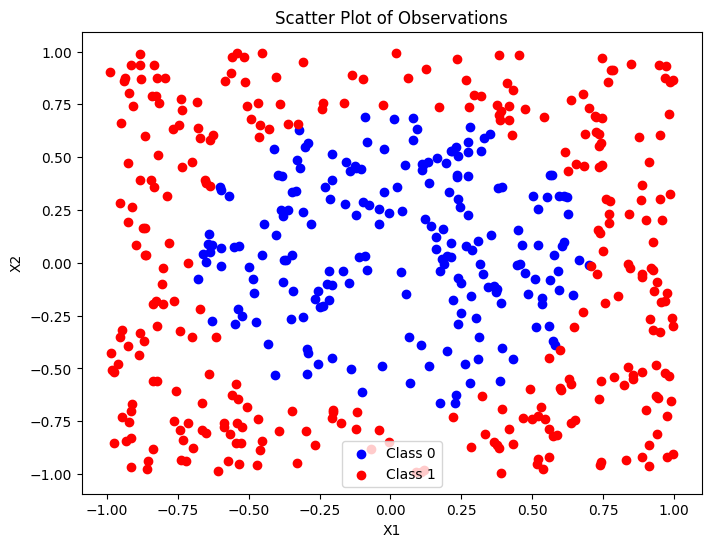

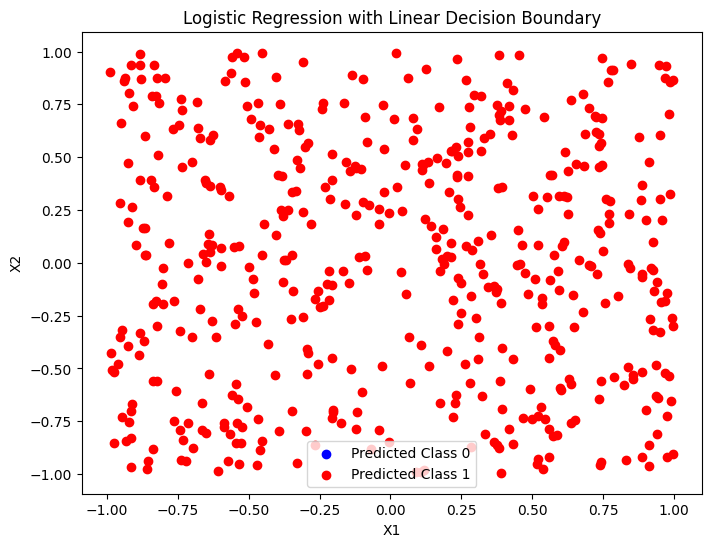

In [ ]:
#Q2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures



def generate_quadratic_data(n=500, p=2):
 X = np.random.uniform(-1, 1, size=(n, p))
 y = np.where(X[:, 0]**2 + X[:, 1]**2 > 0.5, 1, 0)
     return X, y
X, y = generate_quadratic_data(n=500, p=2)


plt.figure(figsize=(8, 6))
plt.scatter(X[y == 0, 0], X[y == 0, 1], color='blue', label='Class 0')
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='red', label='Class 1')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Scatter Plot of Observations')
plt.legend()
plt.show()


model_linear = LogisticRegression()
model_linear.fit(X, y)
y_pred_linear = model_linear.predict(X)

plt.figure(figsize=(8, 6))
plt.scatter(X[y_pred_linear == 0, 0], X[y_pred_linear == 0, 1], color='blue', label='Predicted Class 0')
plt.scatter(X[y_pred_linear == 1, 0], X[y_pred_linear == 1, 1], color='red', label='Predicted Class 1')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Logistic Regression with Linear Decision Boundary')
plt.legend()
plt.show()

poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

model_nonlinear = LogisticRegression()
model_nonlinear.fit(X_poly, y)
y_pred_nonlinear = model_nonlinear.predict(X_poly)

In [ ]:
#Q3

from ISLP import load_data
import numpy as np

Auto = load_data('Auto')
median_mpg = Auto['mpg'].median()
Auto['mpg01'] = np.where(Auto['mpg'] > median_mpg, 1, 0)

from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

X = Auto[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin']]
y = Auto['mpg01']

C_values = [0.01, 0.1, 1, 10, 100]
cv_errors = []

for C in C_values:
    svc = SVC(C=C, kernel='linear')
    scores = cross_val_score(svc, X, y, cv=5)
    cv_errors.append(1 - scores.mean())

for C, error in zip(C_values, cv_errors):
    print(f"C = {C:.2f}, Cross-validation Error = {error:.3f}")

    for kernel in ['rbf', 'poly']:
      cv_errors = []
    for C in C_values:
        svc = SVC(C=C, kernel=kernel)
        scores = cross_val_score(svc, X, y, cv=5)
        cv_errors.append(1 - scores.mean())

    print(f"\nKernel: {kernel}")
    for C, error in zip(C_values, cv_errors):
        print(f"C = {C:.2f}, Cross-validation Error = {error:.3f}")




C = 0.01, Cross-validation Error = 0.122

Kernel: poly
C = 0.01, Cross-validation Error = 0.181
C = 0.10, Cross-validation Error = 0.123
C = 1.00, Cross-validation Error = 0.128
C = 10.00, Cross-validation Error = 0.115
C = 100.00, Cross-validation Error = 0.102
C = 0.10, Cross-validation Error = 0.130

Kernel: poly
C = 0.01, Cross-validation Error = 0.181
C = 0.10, Cross-validation Error = 0.123
C = 1.00, Cross-validation Error = 0.128
C = 10.00, Cross-validation Error = 0.115
C = 100.00, Cross-validation Error = 0.102
C = 1.00, Cross-validation Error = 0.125

Kernel: poly
C = 0.01, Cross-validation Error = 0.181
C = 0.10, Cross-validation Error = 0.123
C = 1.00, Cross-validation Error = 0.128
C = 10.00, Cross-validation Error = 0.115
C = 100.00, Cross-validation Error = 0.102
C = 10.00, Cross-validation Error = 0.138

Kernel: poly
C = 0.01, Cross-validation Error = 0.181
C = 0.10, Cross-validation Error = 0.123
C = 1.00, Cross-validation Error = 0.128
C = 10.00, Cross-validation Erro